In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


Load the Dataset

In [2]:
data = pd.read_csv(r'D:\NLP\NLP Diploma Shaai For AI Using Pytourch\nlp-course-notebooks-master\globalterrorismdb_0718dist.csv', encoding='ISO-8859-1')


C:\Users\Mohamed Elzoka\AppData\Local\Temp\ipykernel_7416\3227317124.py:1: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(r'D:\NLP\NLP Diploma Shaai For AI Using Pytourch\nlp-course-notebooks-master\globalterrorismdb_0718dist.csv', encoding='ISO-8859-1')


Data Cleaning

In [3]:
data = data[['iyear', 'imonth', 'iday', 'country_txt', 'region_txt', 'city', 'latitude', 'longitude', 'nkill', 'nwound', 'gname']]


Data Exploration

In [4]:
print(data.info())
print(data.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 11 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   iyear        181691 non-null  int64  
 1   imonth       181691 non-null  int64  
 2   iday         181691 non-null  int64  
 3   country_txt  181691 non-null  object 
 4   region_txt   181691 non-null  object 
 5   city         181257 non-null  object 
 6   latitude     177135 non-null  float64
 7   longitude    177134 non-null  float64
 8   nkill        171378 non-null  float64
 9   nwound       165380 non-null  float64
 10  gname        181691 non-null  object 
dtypes: float64(4), int64(3), object(4)
memory usage: 15.2+ MB
None
               iyear         imonth           iday       latitude  \
count  181691.000000  181691.000000  181691.000000  177135.000000   
mean     2002.638997       6.467277      15.505644      23.498343   
std        13.259430       3.388303       8.814045     

Identify Hot Zones

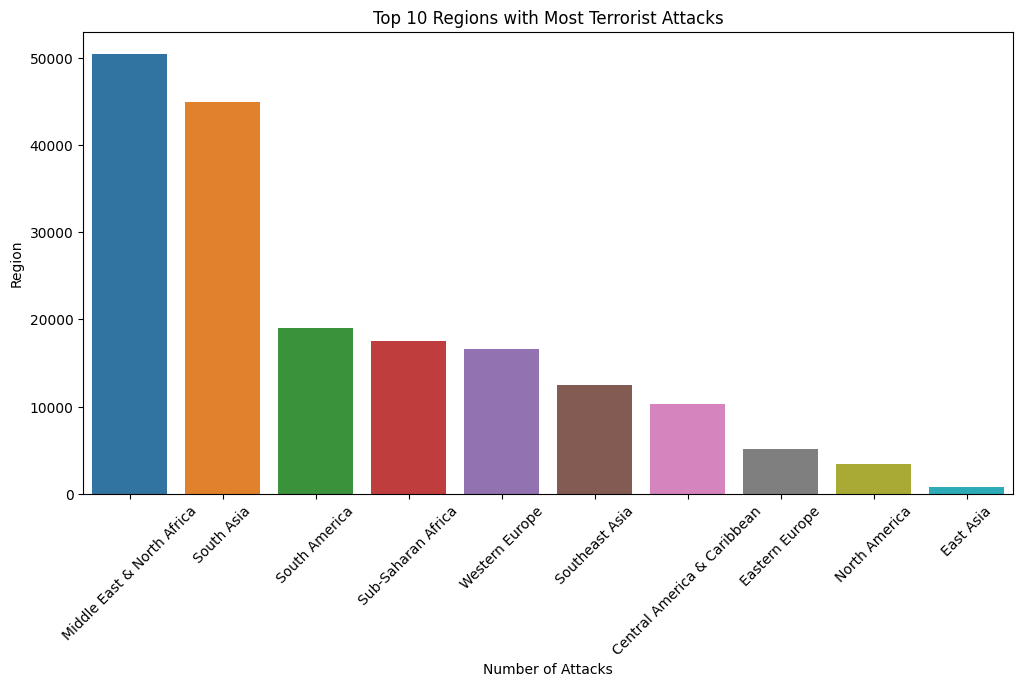

In [5]:
# Group data by region and count the number of attacks
region_attacks = data['region_txt'].value_counts()

# Plot the top N regions with the most attacks
top_n = 10
plt.figure(figsize=(12, 6))
sns.barplot(y=region_attacks[:top_n], x=region_attacks.index[:top_n])
plt.title(f'Top {top_n} Regions with Most Terrorist Attacks')
plt.xlabel('Number of Attacks')
plt.ylabel('Region')
plt.xticks(rotation=45)
plt.show()


C:\Users\Mohamed Elzoka\AppData\Local\Temp\ipykernel_7416\3170172120.py:5: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


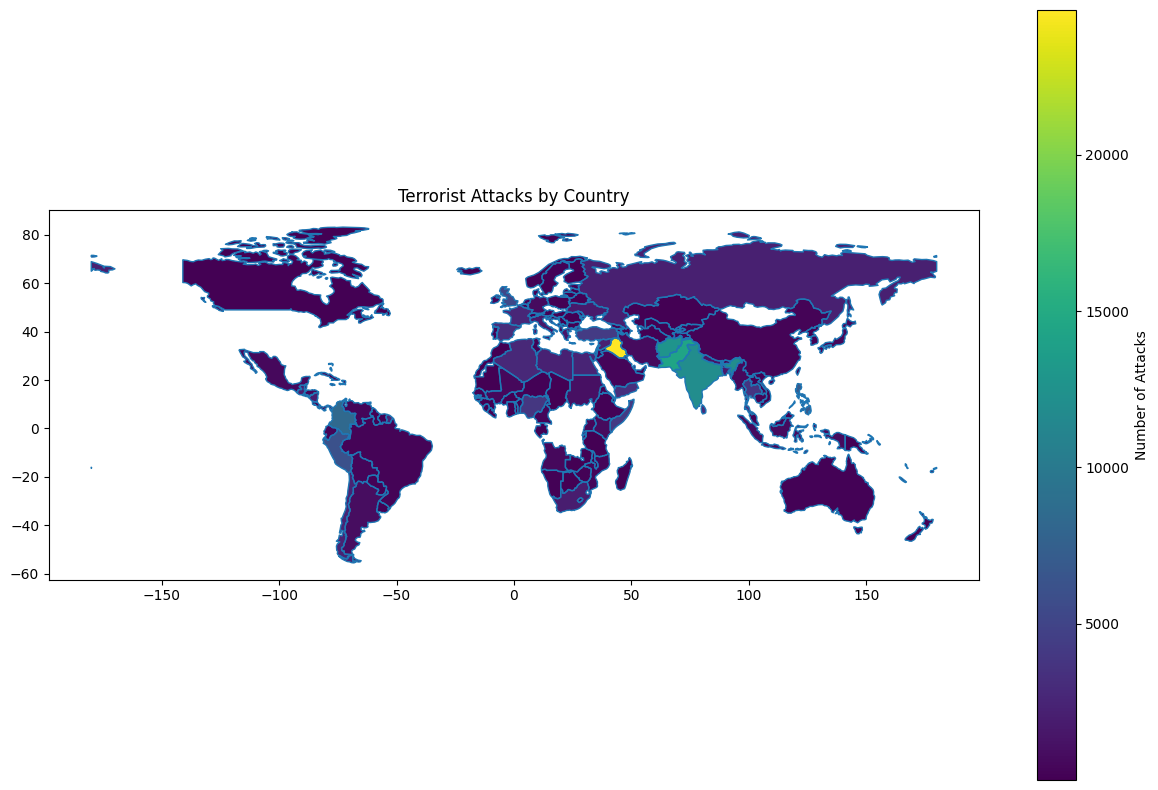

In [6]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Load a world map shapefile
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Group data by country and count the number of attacks
country_attacks = data['country_txt'].value_counts().reset_index()
country_attacks.columns = ['Country', 'Number of Attacks']

# Merge the world map data with the number of attacks data
world = world.merge(country_attacks, left_on='name', right_on='Country')

# Create a choropleth map
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
world.boundary.plot(ax=ax, linewidth=1)
world.plot(column='Number of Attacks', ax=ax, legend=True, legend_kwds={'label': "Number of Attacks"})

plt.title("Terrorist Attacks by Country")
plt.show()


Visualization:
Create visualizations to illustrate hot zones further, like a heatmap of attack locations.

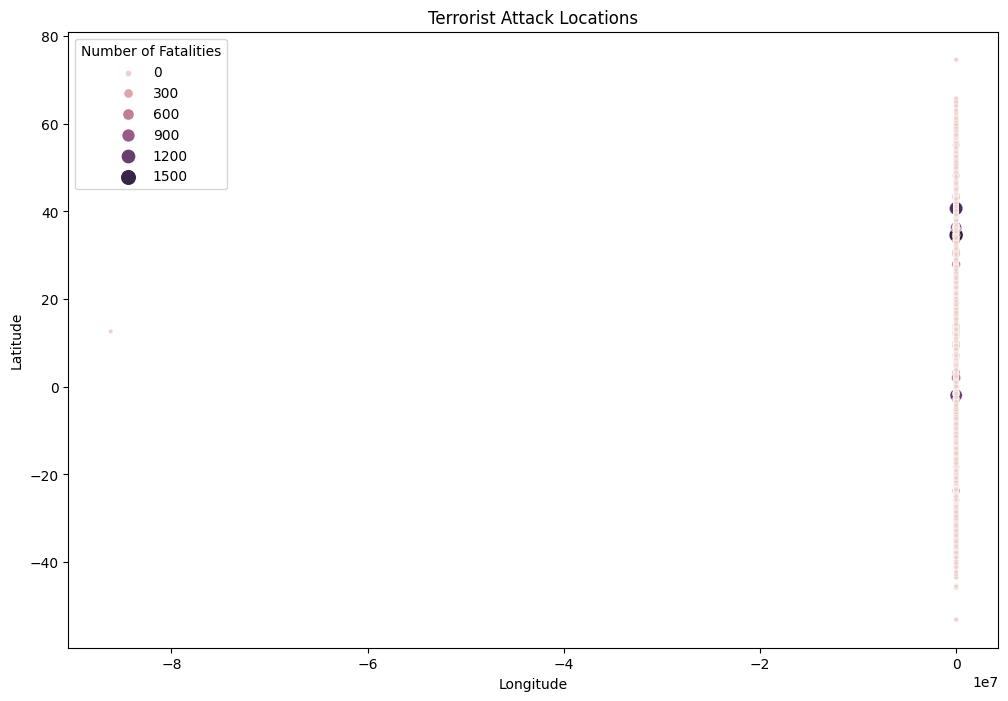

In [7]:
# Create a heatmap of attack locations
plt.figure(figsize=(12, 8))
sns.scatterplot(x='longitude', y='latitude', data=data, hue=data['nkill'], size=data['nkill'], sizes=(10, 100))
plt.title('Terrorist Attack Locations')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(title='Number of Fatalities')
plt.show()


In [8]:
import geopandas as gpd
import plotly.express as px

# Read a world shapefile for mapping
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Group data by country and count the number of attacks
country_attacks = data['country_txt'].value_counts().reset_index()
country_attacks.columns = ['country_txt', 'attack_count']

# Merge the country attack data with the world shapefile
world = world.merge(country_attacks, left_on='name', right_on='country_txt', how='left')

# Create a choropleth map
fig = px.choropleth(world, locations="country_txt", color="attack_count", hover_name="name",
                    color_continuous_scale=px.colors.sequential.Plasma, 
                    title="Terrorist Attacks by Country")
fig.update_geos(projection_type="natural earth")
fig.show()


C:\Users\Mohamed Elzoka\AppData\Local\Temp\ipykernel_7416\4053868036.py:5: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
